# 📌 CREDIT RISK PREDICTION - DAY 2: Data Preprocessing & EDA

### 🎯 Goals for Today
- Clean missing values
- Handle data types & outliers
- Engineer `debt_to_income_ratio`
- Perform exploratory data analysis (EDA)
- Visualize class imbalance in target variable

In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [2]:
# 2. Load Cleanable Dataset
df = pd.read_csv('../data/credit_risk_dataset.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (32581, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
# 3. Check Missing Values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

loan_int_rate        3116
person_emp_length     895
dtype: int64

In [4]:
# 4. Drop Columns with >50% Missing (if any)
threshold = 0.5 * len(df)
df = df.loc[:, df.isnull().sum() < threshold]

In [5]:
# 5. Fill or Drop Remaining Nulls
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [8]:
# 6. Feature Engineering: debt_to_income_ratio
if 'loan_amnt' in df.columns and 'person_income' in df.columns:
    df['debt_to_income_ratio'] = df['loan_amnt'] / df['person_income']
    print("✅ Created debt_to_income_ratio")
else:
    print("⚠️ Required columns missing for ratio")

✅ Created debt_to_income_ratio


In [9]:
# 7. Data Type Overview
df.dtypes.value_counts()

int64      5
object     4
float64    4
Name: count, dtype: int64

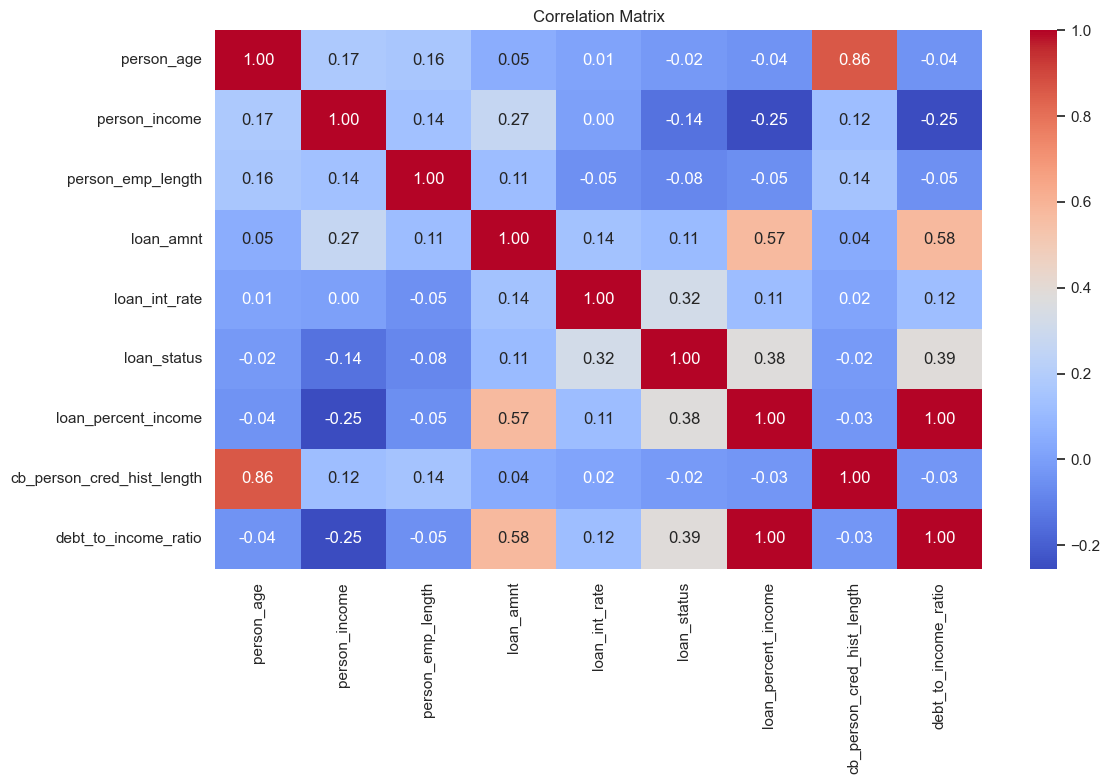

In [14]:
# 8. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('../reports/correlation_heatmap.png')
plt.show()


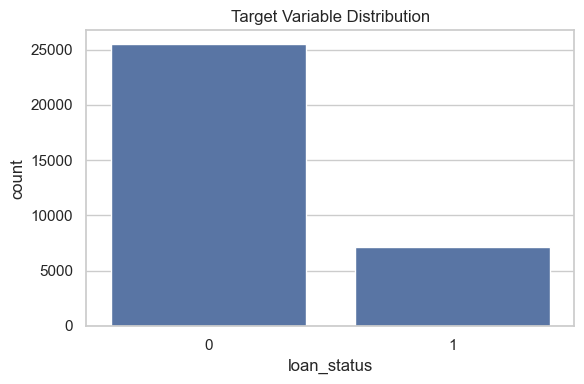

In [15]:
# 9. Class Imbalance in Target
if 'loan_status' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='loan_status')
    plt.title("Target Variable Distribution")
    plt.tight_layout()
    plt.savefig('../reports/target_variable_distribution.png')
    plt.show()
else:
    print("⚠️ 'loan_status' column not found")

In [ ]:
# 10. Save Cleaned Data
df.to_csv('../data/cleaned_credit_data.csv', index=False)
print("✅ Cleaned dataset saved to 'data/cleaned_credit_data.csv'")

✅ Cleaned dataset saved to 'data/cleaned_credit_data.csv'
